# SEI current exploration

6/22/2022

Andrew Weng

(From V. Sulzer: "Nice to catch up last week. Here’s a script that plots negative electrode SOC vs SEI current, might be helpful for coming up with a heuristic for j_sei as a function of z and I (though the conclusion seems to be “it’s not straightforward”)

In [2]:
import pybamm
import matplotlib.pyplot as plt

In [32]:
model = pybamm.lithium_ion.SPM({"SEI": "ec reaction limited"})

experiment = pybamm.Experiment([
    (f"Discharge at C/1 until 3V",
     f"Charge at C/1 until 4.2V", 
     f"Hold at 4.2V until C/50",
    )
])

param = pybamm.ParameterValues("Chen2020")

sim = pybamm.Simulation(model, experiment=experiment, parameter_values=param)
sol = sim.solve()

Text(0, 0.5, 'j_SEI')

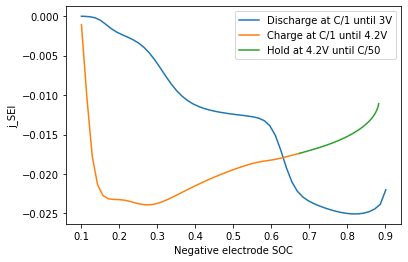

In [36]:
fig, ax = plt.subplots()

for step, op in zip(sol.cycles[0].steps, experiment.operating_conditions_strings):

    theta_n = step["Negative electrode SOC"].data
    j_sei = step["X-averaged SEI interfacial current density [A.m-2]"].data
    ax.plot(theta_n, j_sei, label=op)
    
ax.legend()
ax.set_xlabel("Negative electrode SOC")
ax.set_ylabel("j_SEI")
